# 1. Importing Libraries and datatset

In [1]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


In [9]:
num_words = 4000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=4000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


#### There are total 50k movie reviews

# 2. Data preprocessing

In [10]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [11]:
print(y_train[0])    # 1 is positive review

1


#### we will consider only  500 words in a review and pas shorter reviews with zeros

In [12]:
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [13]:
print(x_train[10])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    1  785  189  438   47  110
  142    7    6    2  120    4  236  378    7  153   19   87  108  141
   17 1004    5    2  883    2   23    8    4  136    2    2    4    2
   43 1076   21 1407  419    5    2  120   91  682  189 2818    5    9
 1348   31    7    4  118  785  189  108  126   93    2   16  540  324
   23    6  364  352   21   14    9   93   56   18   11  230   53  771
   74   31   34    4 2834    7    4   22    5   14   11  471    9    2
   34    4  321  487    5  116   15    2    4   22    9    6 2286    4
  114 2679   23  107  293 1008 1172    5  328 1236    4 1375  109    9
    6  132  773    2 1412    8 1172   18    2   29    9  276   11    6
 2768   19  289  409    4    2 2140    2  648 1430    2    2    5   27
 3000 

In [14]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


# 3. Building Neural Network

In [31]:
model = Sequential()
model.add(Embedding(num_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           128000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 4,191,251
Trainable params: 4,191,251
Non-trainable params: 0
____________________________________________

In [33]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=128, verbose=2)

C:\Users\tarun\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 30s - loss: 0.4896 - accuracy: 0.7234 - val_loss: 0.2966 - val_accuracy: 0.8748
Epoch 2/2
 - 30s - loss: 0.1894 - accuracy: 0.9280 - val_loss: 0.3310 - val_accuracy: 0.8654


# 4. Evaluating model

In [34]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.54%


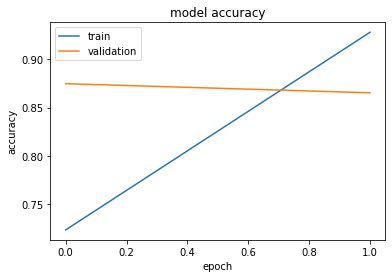

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

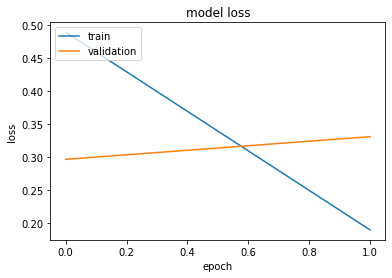

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()